In [ ]:
# Read the data set
# Do data pre-processing
# Split the data into train and test
# Build the Logistic model
# Train the classifier
# Test the classifier with test data
# Measure precision, recall and f1-score and accuracy of the model.

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from math import sqrt

In [5]:
df = pd.read_csv("D:/Study/MCA/4th Sem/DA/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [56]:
X = df.iloc[:,1:30]
print(X.head())
Y = df['Class']
print(Y.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10   ...         V20       V21       V22  \
0  0.098698  0.363787  0.090794   ...    0.251412 -0.018307  0.277838   
1  0.085102 -0.255425 -0.166974   ...   -0.069083 -0.225775 -0.638672   
2  0.247676 -1.514654  0.207643   ...    0.524980  0.247998  0.771679   
3  0.377436 -1.387024 -0.054952   ...   -0.208038 -0.108300  0.005274   
4 -0.270533  0.817739  0.753074   ...    0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Amount  
0 -0.110474  0.066928  0.128539 -0.189

In [57]:
X.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [58]:
# X_train = X[:-56962]
# X_test = X[-56962:]

# Y_train = Y[:-56962]
# Y_test = Y[-56962:]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_train.ndim)
print(X_test.ndim)
print(Y_train.ndim)
print(Y_test.ndim)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

print("Total number of frauds :", len(Y.loc[df['Class'] == 1]), len(Y.loc[df['Class'] == 1]) / len(Y))
logR = LogisticRegression()
logR.fit(X_train, Y_train)
predR = logR.predict(X_test)
print(predR)

2
2
1
1
227845
56962
227845
56962
Total number of frauds : 492 0.001727485630620034


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1 0 0 ... 0 0 0]


In [59]:
Y_pred = logR.predict(X_test)

In [60]:
cr = (classification_report(Y_test, Y_pred))
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [62]:
# Classification report
cm = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix :", cm)

# Precision = TP / TP + TN
# Recall = TP / TP + FP

Confusion Matrix : [[56855     9]
 [   42    56]]


In [63]:
accu = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy Score", accu * 100)
print(round(accu,1))

Accuracy Score 99.91046662687407
1.0


AUC:0.786
fpr : [0.00000000e+00 1.58272369e-04 1.00000000e+00]

tpr : [0.         0.57142857 1.        ]
Threshold : [2 1 0]


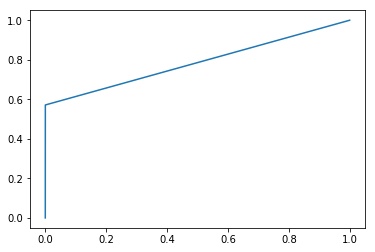

In [72]:
#calculate AUC - Area Under Curve
auc = roc_auc_score(Y_test, Y_pred)
print('AUC:%.3f' % auc)

# calculate ROC curve - Receiveral Operation Characteristics
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
print("fpr :", fpr)
print("\ntpr :", tpr)
print("Threshold :", thresholds)

#plot the roc curve for the model
plt.plot(fpr, tpr)
plt.show()